In [405]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [309]:
#read the dataset
df = pd.read_csv('C:\\Users\\pdongre\\Downloads\\HBI_dataset\\raw\\LANGEVIN_DATA.txt', sep = " ")
df

,735080.000000,1.000000,0.000000,0.000000.1,NaN,24.584695,63.517000,0.030988,24.584695.1,NaN.1,...,NaN.50,1.000000.6,1.000000.7,2.000000.8,4.000000.6,2.000000.9,2.000000.10,4.000000.7,-0.270899,Unnamed: 118
0,735080.010417,1.0,0.0,0.0,NaN,24.584695,63.7040,0.030988,24.584695,NaN,...,NaN,1.0,1.0,2.0,4.0,2.0,2.0,4.0,-0.269505,NaN
1,735080.020833,1.0,0.0,0.0,NaN,24.584695,63.8560,0.030988,24.584695,NaN,...,NaN,1.0,1.0,2.0,4.0,2.0,2.0,4.0,-0.268373,NaN
2,735080.031250,1.0,0.0,0.0,NaN,24.584695,64.0390,0.030988,24.584695,NaN,...,NaN,1.0,1.0,2.0,4.0,2.0,2.0,4.0,-0.267009,NaN
3,735080.041667,1.0,0.0,0.0,NaN,24.498384,64.2820,0.030988,24.498384,NaN,...,NaN,1.0,1.0,2.0,4.0,2.0,2.0,4.0,-0.297025,NaN
4,735080.052083,1.0,0.0,0.0,NaN,24.671003,64.5850,0.030988,24.671003,NaN,...,NaN,1.0,1.0,2.0,4.0,2.0,2.0,4.0,-0.231101,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840978,735444.958332,24.0,0.0,0.0,NaN,NaN,31.0155,0.026924,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840979,735444.968749,24.0,0.0,0.0,NaN,NaN,31.0155,0.026924,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840980,735444.979165,24.0,0.0,0.0,NaN,NaN,31.0155,0.026924,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840981,735444.989582,24.0,0.0,0.0,NaN,NaN,31.0155,0.026924,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [310]:
#read the features and combine them with the dataset
columnsDf = pd.read_csv('C:\\Users\\pdongre\\Downloads\\HBI_dataset\\raw\\columns.csv')
columnsDfT = columnsDf.T.reset_index()
df = df.iloc[: , :-1]
df.columns = columnsDfT.iloc[0]
df

,Time,Occupant Number,Occupancy 1,Occupancy 2,Survey Time,INDOOR Ambient Temp.,INDOOR Relative Humidity,INDOOR Air Velocity,INDOOR Mean Radiant Temp.,INDOOR Lumens,...,BLINDS effectiveness,Reported Discomfort to Management,Chooses set point that maximizes PRODUCTIVITY,Chooses set point that maximized COMFORT/PLEASURE,Wishes set point to stay at setting they choose,Chooses set point that is most agreeable to OTHERS,Chooses set point that is most ENERGY EFFICIENT,Chooses set point most in line with MGMT policies,Choooses set point most TYPICAL of office setting,Predicted Mean Vote (PMV)
0,735080.010417,1.0,0.0,0.0,NaN,24.584695,63.7040,0.030988,24.584695,NaN,...,0.0,NaN,1.0,1.0,2.0,4.0,2.0,2.0,4.0,-0.269505
1,735080.020833,1.0,0.0,0.0,NaN,24.584695,63.8560,0.030988,24.584695,NaN,...,0.0,NaN,1.0,1.0,2.0,4.0,2.0,2.0,4.0,-0.268373
2,735080.031250,1.0,0.0,0.0,NaN,24.584695,64.0390,0.030988,24.584695,NaN,...,0.0,NaN,1.0,1.0,2.0,4.0,2.0,2.0,4.0,-0.267009
3,735080.041667,1.0,0.0,0.0,NaN,24.498384,64.2820,0.030988,24.498384,NaN,...,0.0,NaN,1.0,1.0,2.0,4.0,2.0,2.0,4.0,-0.297025
4,735080.052083,1.0,0.0,0.0,NaN,24.671003,64.5850,0.030988,24.671003,NaN,...,0.0,NaN,1.0,1.0,2.0,4.0,2.0,2.0,4.0,-0.231101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840978,735444.958332,24.0,0.0,0.0,NaN,NaN,31.0155,0.026924,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840979,735444.968749,24.0,0.0,0.0,NaN,NaN,31.0155,0.026924,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840980,735444.979165,24.0,0.0,0.0,NaN,NaN,31.0155,0.026924,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840981,735444.989582,24.0,0.0,0.0,NaN,NaN,31.0155,0.026924,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [699]:
#simplifying the dataset
df1 = df[['Occupant Number', 
        'OUTDOOR Ambient Temp.', 'OUTDOOR Relative Humidity', 
        'INDOOR Ambient Temp.', 'INDOOR Relative Humidity', 
        'Base Thermostat COOLING Setpoint', 'Base Thermostat HEATING Setpoint', 
        'Current Thermostat COOLING Setpoint', 'Current Thermostat HEATING Setpoint', 
        'Thermal Preference (right now)', 'Thermal Sensation (right now)', 'General Thermal Comfort (right now)', 
        'Chooses set point that maximizes PRODUCTIVITY', 'Chooses set point that maximized COMFORT/PLEASURE', 'Wishes set point to stay at setting they choose', 
        'Chooses set point that is most agreeable to OTHERS', 'Chooses set point that is most ENERGY EFFICIENT', 
        'Chooses set point most in line with MGMT policies', 'Choooses set point most TYPICAL of office setting',
        'Action on WINDOW (recently)', 'Action on LOCAL FAN (recently)', 
        'Action on LOCAL HEATER (recently)', 'Action on THERMOSTAT (recently)', 'Reported Discomfort to Management']]
df1

,Occupant Number,OUTDOOR Ambient Temp.,OUTDOOR Relative Humidity,INDOOR Ambient Temp.,INDOOR Relative Humidity,Base Thermostat COOLING Setpoint,Base Thermostat HEATING Setpoint,Current Thermostat COOLING Setpoint,Current Thermostat HEATING Setpoint,Thermal Preference (right now),...,Wishes set point to stay at setting they choose,Chooses set point that is most agreeable to OTHERS,Chooses set point that is most ENERGY EFFICIENT,Chooses set point most in line with MGMT policies,Choooses set point most TYPICAL of office setting,Action on WINDOW (recently),Action on LOCAL FAN (recently),Action on LOCAL HEATER (recently),Action on THERMOSTAT (recently),Reported Discomfort to Management
0,1.0,23.0,89.0,24.584695,63.7040,25.555556,24.444444,18.333333,26.666667,NaN,...,2.0,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN
1,1.0,23.0,89.0,24.584695,63.8560,25.555556,24.444444,18.333333,26.666667,NaN,...,2.0,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN
2,1.0,23.0,89.0,24.584695,64.0390,25.555556,24.444444,18.333333,26.666667,NaN,...,2.0,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN
3,1.0,23.0,89.0,24.498384,64.2820,25.555556,24.444444,18.333333,26.666667,NaN,...,2.0,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN
4,1.0,23.0,89.0,24.671003,64.5850,25.555556,24.444444,18.333333,26.666667,NaN,...,2.0,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840978,24.0,NaN,NaN,NaN,31.0155,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840979,24.0,NaN,NaN,NaN,31.0155,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840980,24.0,NaN,NaN,NaN,31.0155,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840981,24.0,NaN,NaN,NaN,31.0155,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [700]:
#desribing the simplified dataset that contains
df1.describe()

,Occupant Number,OUTDOOR Ambient Temp.,OUTDOOR Relative Humidity,INDOOR Ambient Temp.,INDOOR Relative Humidity,Base Thermostat COOLING Setpoint,Base Thermostat HEATING Setpoint,Current Thermostat COOLING Setpoint,Current Thermostat HEATING Setpoint,Thermal Preference (right now),...,Wishes set point to stay at setting they choose,Chooses set point that is most agreeable to OTHERS,Chooses set point that is most ENERGY EFFICIENT,Chooses set point most in line with MGMT policies,Choooses set point most TYPICAL of office setting,Action on WINDOW (recently),Action on LOCAL FAN (recently),Action on LOCAL HEATER (recently),Action on THERMOSTAT (recently),Reported Discomfort to Management
count,840983.000000,788349.000000,788349.000000,775457.000000,840983.000000,370372.000000,370372.000000,707548.000000,707543.000000,566.000000,...,755443.000000,755443.000000,755443.000000,755443.000000,755443.000000,2497.000000,2497.000000,2497.000000,2497.000000,874.000000
mean,12.500014,13.805037,63.874880,22.643547,36.298559,24.526260,22.491386,19.080511,25.367891,-0.017668,...,2.255238,3.664607,2.622386,3.117884,3.214073,0.030837,0.112936,0.047257,0.014417,0.010297
std,6.922183,9.926909,19.397218,1.816115,13.820605,1.300448,1.533288,4.855483,1.676283,0.775537,...,1.795423,1.640851,1.884584,2.140578,1.775177,0.253679,0.418977,0.305153,0.171579,0.111777
min,1.000000,-11.000000,16.000000,11.223889,11.249000,21.111111,15.555556,-17.777778,-17.777778,-2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,5.166667,48.000000,21.693903,25.213000,23.888889,22.222222,18.333333,24.088889,-1.000000,...,1.000000,3.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.000000,13.000000,64.000000,22.823889,31.015500,24.444444,22.777778,20.866667,26.044444,0.000000,...,2.000000,4.000000,3.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.500000,23.000000,81.000000,23.737222,49.237000,25.000000,23.333333,22.644444,26.666667,0.000000,...,3.000000,5.000000,4.000000,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,24.000000,36.000000,100.000000,32.338997,85.554000,27.777778,25.000000,26.666667,30.555556,2.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,4.000000,4.000000,4.000000,3.000000,2.000000


In [701]:
#removing all empty rows
df2 = df1.dropna(how='all')
df2

,Occupant Number,OUTDOOR Ambient Temp.,OUTDOOR Relative Humidity,INDOOR Ambient Temp.,INDOOR Relative Humidity,Base Thermostat COOLING Setpoint,Base Thermostat HEATING Setpoint,Current Thermostat COOLING Setpoint,Current Thermostat HEATING Setpoint,Thermal Preference (right now),...,Wishes set point to stay at setting they choose,Chooses set point that is most agreeable to OTHERS,Chooses set point that is most ENERGY EFFICIENT,Chooses set point most in line with MGMT policies,Choooses set point most TYPICAL of office setting,Action on WINDOW (recently),Action on LOCAL FAN (recently),Action on LOCAL HEATER (recently),Action on THERMOSTAT (recently),Reported Discomfort to Management
0,1.0,23.0,89.0,24.584695,63.7040,25.555556,24.444444,18.333333,26.666667,NaN,...,2.0,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN
1,1.0,23.0,89.0,24.584695,63.8560,25.555556,24.444444,18.333333,26.666667,NaN,...,2.0,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN
2,1.0,23.0,89.0,24.584695,64.0390,25.555556,24.444444,18.333333,26.666667,NaN,...,2.0,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN
3,1.0,23.0,89.0,24.498384,64.2820,25.555556,24.444444,18.333333,26.666667,NaN,...,2.0,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN
4,1.0,23.0,89.0,24.671003,64.5850,25.555556,24.444444,18.333333,26.666667,NaN,...,2.0,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840978,24.0,NaN,NaN,NaN,31.0155,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840979,24.0,NaN,NaN,NaN,31.0155,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840980,24.0,NaN,NaN,NaN,31.0155,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840981,24.0,NaN,NaN,NaN,31.0155,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [702]:
df2['General Thermal Comfort (right now)'].value_counts()

5.0    1265
4.0     755
3.0     278
6.0     158
2.0      33
1.0       7
Name: General Thermal Comfort (right now), dtype: int64

In [703]:
#considering only values > 0 for general thermal comfort in df1
df3 = df1[df1['General Thermal Comfort (right now)'] > 0]
df3

,Occupant Number,OUTDOOR Ambient Temp.,OUTDOOR Relative Humidity,INDOOR Ambient Temp.,INDOOR Relative Humidity,Base Thermostat COOLING Setpoint,Base Thermostat HEATING Setpoint,Current Thermostat COOLING Setpoint,Current Thermostat HEATING Setpoint,Thermal Preference (right now),...,Wishes set point to stay at setting they choose,Chooses set point that is most agreeable to OTHERS,Chooses set point that is most ENERGY EFFICIENT,Chooses set point most in line with MGMT policies,Choooses set point most TYPICAL of office setting,Action on WINDOW (recently),Action on LOCAL FAN (recently),Action on LOCAL HEATER (recently),Action on THERMOSTAT (recently),Reported Discomfort to Management
707,1.0,28.0,66.0,23.721585,61.785,25.555556,24.444444,23.022222,25.244444,NaN,...,2.0,4.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,NaN
719,1.0,30.0,46.0,23.980518,58.670,25.555556,24.444444,23.022222,25.244444,NaN,...,2.0,4.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,NaN
735,1.0,32.0,38.0,24.066829,54.120,25.555556,24.444444,23.022222,25.244444,NaN,...,2.0,4.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,NaN
809,1.0,27.0,51.0,23.290030,49.107,25.555556,24.444444,23.022222,25.244444,NaN,...,2.0,4.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,NaN
816,1.0,28.0,48.0,23.548963,48.594,25.555556,24.444444,23.022222,25.244444,NaN,...,2.0,4.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806854,24.0,31.0,43.0,23.593889,55.626,26.666667,25.000000,20.000000,23.333333,NaN,...,2.0,4.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,NaN
806870,24.0,30.0,46.0,23.593889,55.626,26.666667,25.000000,20.000000,23.333333,NaN,...,2.0,4.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,NaN
806935,24.0,26.0,84.0,23.231392,55.626,26.666667,25.000000,20.000000,23.333333,NaN,...,2.0,4.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,NaN
806950,24.0,31.0,55.0,24.680556,55.626,26.666667,25.000000,22.177778,25.511111,NaN,...,2.0,4.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,NaN


In [704]:
df3['Thermal Preference (right now)'].value_counts()

 0.0    298
-1.0    149
 1.0     95
 2.0     23
-2.0      1
Name: Thermal Preference (right now), dtype: int64

In [705]:
df3.isna().sum()

0
Occupant Number                                          0
OUTDOOR Ambient Temp.                                    0
OUTDOOR Relative Humidity                                0
INDOOR Ambient Temp.                                    17
INDOOR Relative Humidity                                 0
Base Thermostat COOLING Setpoint                      1086
Base Thermostat HEATING Setpoint                      1086
Current Thermostat COOLING Setpoint                    129
Current Thermostat HEATING Setpoint                    129
Thermal Preference (right now)                        1930
Thermal Sensation (right now)                            0
General Thermal Comfort (right now)                      0
Chooses set point that maximizes PRODUCTIVITY          125
Chooses set point that maximized COMFORT/PLEASURE      125
Wishes set point to stay at setting they choose        125
Chooses set point that is most agreeable to OTHERS     125
Chooses set point that is most ENERGY EFFICIENT       

array([[<AxesSubplot:title={'center':'Occupant Number'}>,
        <AxesSubplot:title={'center':'OUTDOOR Ambient Temp.'}>,
        <AxesSubplot:title={'center':'OUTDOOR Relative Humidity'}>,
        <AxesSubplot:title={'center':'INDOOR Ambient Temp.'}>,
        <AxesSubplot:title={'center':'INDOOR Relative Humidity'}>],
       [<AxesSubplot:title={'center':'Base Thermostat COOLING Setpoint'}>,
        <AxesSubplot:title={'center':'Base Thermostat HEATING Setpoint'}>,
        <AxesSubplot:title={'center':'Current Thermostat COOLING Setpoint'}>,
        <AxesSubplot:title={'center':'Current Thermostat HEATING Setpoint'}>,
        <AxesSubplot:title={'center':'Thermal Preference (right now)'}>],
       [<AxesSubplot:title={'center':'Thermal Sensation (right now)'}>,
        <AxesSubplot:title={'center':'General Thermal Comfort (right now)'}>,
        <AxesSubplot:title={'center':'Chooses set point that maximizes PRODUCTIVITY'}>,
        <AxesSubplot:title={'center':'Chooses set point that 

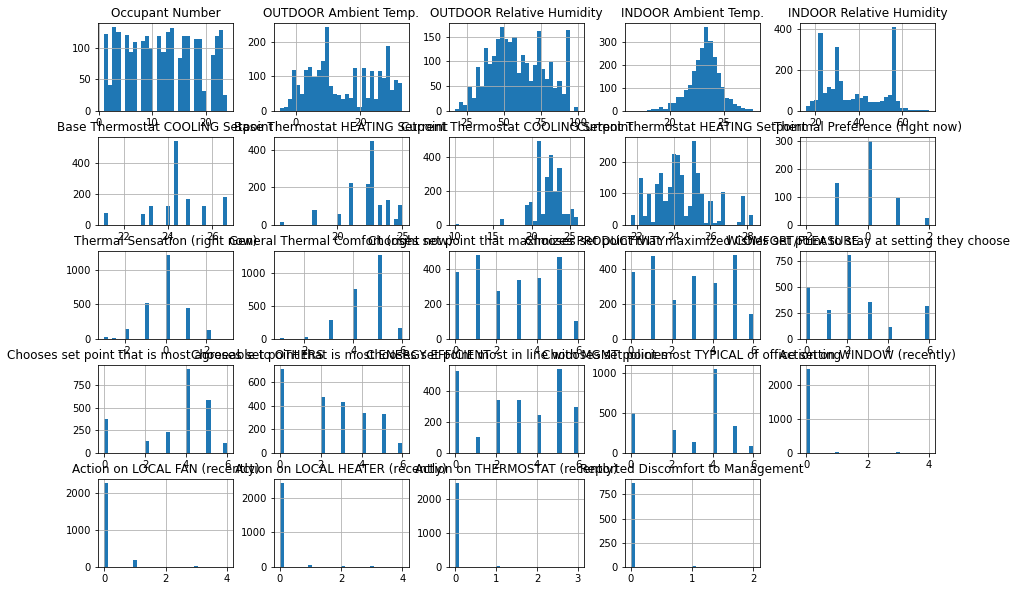

In [706]:
df3.hist(bins=30, figsize=(15, 10))

In [707]:
#using kNN imputation because it is a seasonal dataset
imputer = KNNImputer()
df4 = pd.DataFrame(imputer.fit_transform(df3),columns = df3.columns)
df4

,Occupant Number,OUTDOOR Ambient Temp.,OUTDOOR Relative Humidity,INDOOR Ambient Temp.,INDOOR Relative Humidity,Base Thermostat COOLING Setpoint,Base Thermostat HEATING Setpoint,Current Thermostat COOLING Setpoint,Current Thermostat HEATING Setpoint,Thermal Preference (right now),...,Wishes set point to stay at setting they choose,Chooses set point that is most agreeable to OTHERS,Chooses set point that is most ENERGY EFFICIENT,Chooses set point most in line with MGMT policies,Choooses set point most TYPICAL of office setting,Action on WINDOW (recently),Action on LOCAL FAN (recently),Action on LOCAL HEATER (recently),Action on THERMOSTAT (recently),Reported Discomfort to Management
0,1.0,28.0,66.0,23.721585,61.785,25.555556,24.444444,23.022222,25.244444,0.2,...,2.0,4.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.2
1,1.0,30.0,46.0,23.980518,58.670,25.555556,24.444444,23.022222,25.244444,0.2,...,2.0,4.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0
2,1.0,32.0,38.0,24.066829,54.120,25.555556,24.444444,23.022222,25.244444,0.2,...,2.0,4.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0
3,1.0,27.0,51.0,23.290030,49.107,25.555556,24.444444,23.022222,25.244444,0.2,...,2.0,4.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.4
4,1.0,28.0,48.0,23.548963,48.594,25.555556,24.444444,23.022222,25.244444,0.0,...,2.0,4.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,24.0,31.0,43.0,23.593889,55.626,26.666667,25.000000,20.000000,23.333333,-0.2,...,2.0,4.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
2492,24.0,30.0,46.0,23.593889,55.626,26.666667,25.000000,20.000000,23.333333,-0.2,...,2.0,4.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
2493,24.0,26.0,84.0,23.231392,55.626,26.666667,25.000000,20.000000,23.333333,-0.4,...,2.0,4.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
2494,24.0,31.0,55.0,24.680556,55.626,26.666667,25.000000,22.177778,25.511111,-0.2,...,2.0,4.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0


In [708]:
df4.isna().sum()

0
Occupant Number                                       0
OUTDOOR Ambient Temp.                                 0
OUTDOOR Relative Humidity                             0
INDOOR Ambient Temp.                                  0
INDOOR Relative Humidity                              0
Base Thermostat COOLING Setpoint                      0
Base Thermostat HEATING Setpoint                      0
Current Thermostat COOLING Setpoint                   0
Current Thermostat HEATING Setpoint                   0
Thermal Preference (right now)                        0
Thermal Sensation (right now)                         0
General Thermal Comfort (right now)                   0
Chooses set point that maximizes PRODUCTIVITY         0
Chooses set point that maximized COMFORT/PLEASURE     0
Wishes set point to stay at setting they choose       0
Chooses set point that is most agreeable to OTHERS    0
Chooses set point that is most ENERGY EFFICIENT       0
Chooses set point most in line with MGMT polic

In [709]:
#rounding off qualitative features
df4['Thermal Preference (right now)'] = df4['Thermal Preference (right now)'].round()
df4['Chooses set point that maximizes PRODUCTIVITY'] = df4['Chooses set point that maximizes PRODUCTIVITY'].round()
df4['Chooses set point that maximized COMFORT/PLEASURE'] = df4['Chooses set point that maximized COMFORT/PLEASURE'].round()
df4['Wishes set point to stay at setting they choose'] = df4['Wishes set point to stay at setting they choose'].round()
df4['Chooses set point that is most agreeable to OTHERS'] = df4['Chooses set point that is most agreeable to OTHERS'].round()
df4['Chooses set point that is most ENERGY EFFICIENT'] = df4['Chooses set point that is most ENERGY EFFICIENT'].round()
df4['Chooses set point most in line with MGMT policies'] = df4['Chooses set point most in line with MGMT policies'].round()
df4['Choooses set point most TYPICAL of office setting'] = df4['Choooses set point most TYPICAL of office setting'].round()
df4['Reported Discomfort to Management'] = df4['Reported Discomfort to Management'].round()
df4

,Occupant Number,OUTDOOR Ambient Temp.,OUTDOOR Relative Humidity,INDOOR Ambient Temp.,INDOOR Relative Humidity,Base Thermostat COOLING Setpoint,Base Thermostat HEATING Setpoint,Current Thermostat COOLING Setpoint,Current Thermostat HEATING Setpoint,Thermal Preference (right now),...,Wishes set point to stay at setting they choose,Chooses set point that is most agreeable to OTHERS,Chooses set point that is most ENERGY EFFICIENT,Chooses set point most in line with MGMT policies,Choooses set point most TYPICAL of office setting,Action on WINDOW (recently),Action on LOCAL FAN (recently),Action on LOCAL HEATER (recently),Action on THERMOSTAT (recently),Reported Discomfort to Management
0,1.0,28.0,66.0,23.721585,61.785,25.555556,24.444444,23.022222,25.244444,0.0,...,2.0,4.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0
1,1.0,30.0,46.0,23.980518,58.670,25.555556,24.444444,23.022222,25.244444,0.0,...,2.0,4.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0
2,1.0,32.0,38.0,24.066829,54.120,25.555556,24.444444,23.022222,25.244444,0.0,...,2.0,4.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0
3,1.0,27.0,51.0,23.290030,49.107,25.555556,24.444444,23.022222,25.244444,0.0,...,2.0,4.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0
4,1.0,28.0,48.0,23.548963,48.594,25.555556,24.444444,23.022222,25.244444,0.0,...,2.0,4.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,24.0,31.0,43.0,23.593889,55.626,26.666667,25.000000,20.000000,23.333333,-0.0,...,2.0,4.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
2492,24.0,30.0,46.0,23.593889,55.626,26.666667,25.000000,20.000000,23.333333,-0.0,...,2.0,4.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
2493,24.0,26.0,84.0,23.231392,55.626,26.666667,25.000000,20.000000,23.333333,-0.0,...,2.0,4.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
2494,24.0,31.0,55.0,24.680556,55.626,26.666667,25.000000,22.177778,25.511111,-0.0,...,2.0,4.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0


array([[<AxesSubplot:title={'center':'Occupant Number'}>,
        <AxesSubplot:title={'center':'OUTDOOR Ambient Temp.'}>,
        <AxesSubplot:title={'center':'OUTDOOR Relative Humidity'}>,
        <AxesSubplot:title={'center':'INDOOR Ambient Temp.'}>,
        <AxesSubplot:title={'center':'INDOOR Relative Humidity'}>],
       [<AxesSubplot:title={'center':'Base Thermostat COOLING Setpoint'}>,
        <AxesSubplot:title={'center':'Base Thermostat HEATING Setpoint'}>,
        <AxesSubplot:title={'center':'Current Thermostat COOLING Setpoint'}>,
        <AxesSubplot:title={'center':'Current Thermostat HEATING Setpoint'}>,
        <AxesSubplot:title={'center':'Thermal Preference (right now)'}>],
       [<AxesSubplot:title={'center':'Thermal Sensation (right now)'}>,
        <AxesSubplot:title={'center':'General Thermal Comfort (right now)'}>,
        <AxesSubplot:title={'center':'Chooses set point that maximizes PRODUCTIVITY'}>,
        <AxesSubplot:title={'center':'Chooses set point that 

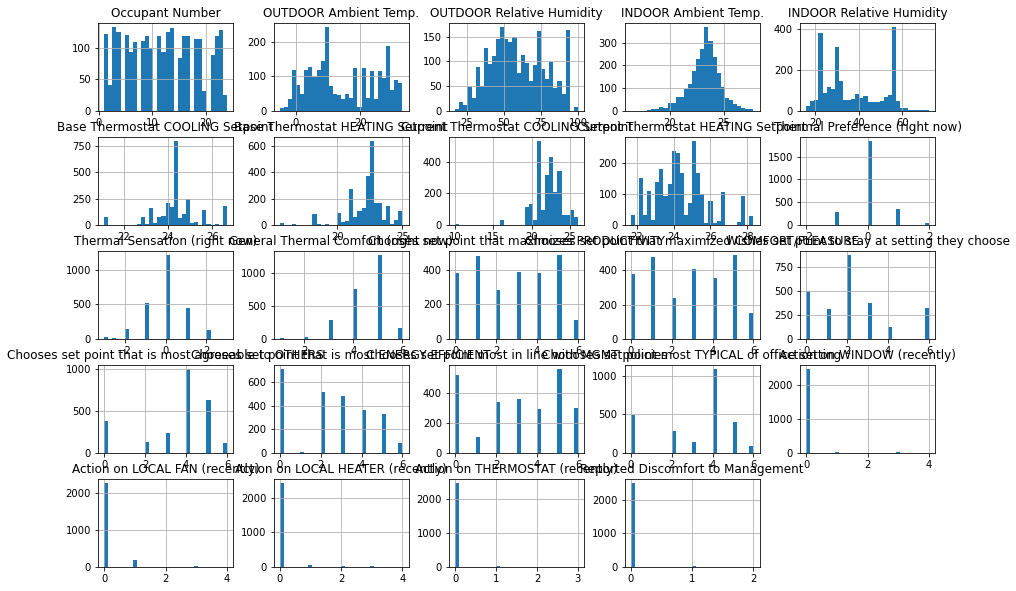

In [710]:
df4.hist(bins=30, figsize=(15, 10))

In [962]:
#Categorizing the dataset into warm, cold, and neutral personas based on feature 'Thermal Preference (right now)'
dfCold = df4[df4['Thermal Preference (right now)'] < 0]
dfWarm = df4[df4['Thermal Preference (right now)'] > 0]
dfNeutral = df4[df4['Thermal Preference (right now)'] == 0]

array([[<AxesSubplot:title={'center':'Occupant Number'}>,
        <AxesSubplot:title={'center':'OUTDOOR Ambient Temp.'}>,
        <AxesSubplot:title={'center':'OUTDOOR Relative Humidity'}>,
        <AxesSubplot:title={'center':'INDOOR Ambient Temp.'}>,
        <AxesSubplot:title={'center':'INDOOR Relative Humidity'}>],
       [<AxesSubplot:title={'center':'Base Thermostat COOLING Setpoint'}>,
        <AxesSubplot:title={'center':'Base Thermostat HEATING Setpoint'}>,
        <AxesSubplot:title={'center':'Current Thermostat COOLING Setpoint'}>,
        <AxesSubplot:title={'center':'Current Thermostat HEATING Setpoint'}>,
        <AxesSubplot:title={'center':'Thermal Preference (right now)'}>],
       [<AxesSubplot:title={'center':'Thermal Sensation (right now)'}>,
        <AxesSubplot:title={'center':'General Thermal Comfort (right now)'}>,
        <AxesSubplot:title={'center':'Chooses set point that maximizes PRODUCTIVITY'}>,
        <AxesSubplot:title={'center':'Chooses set point that 

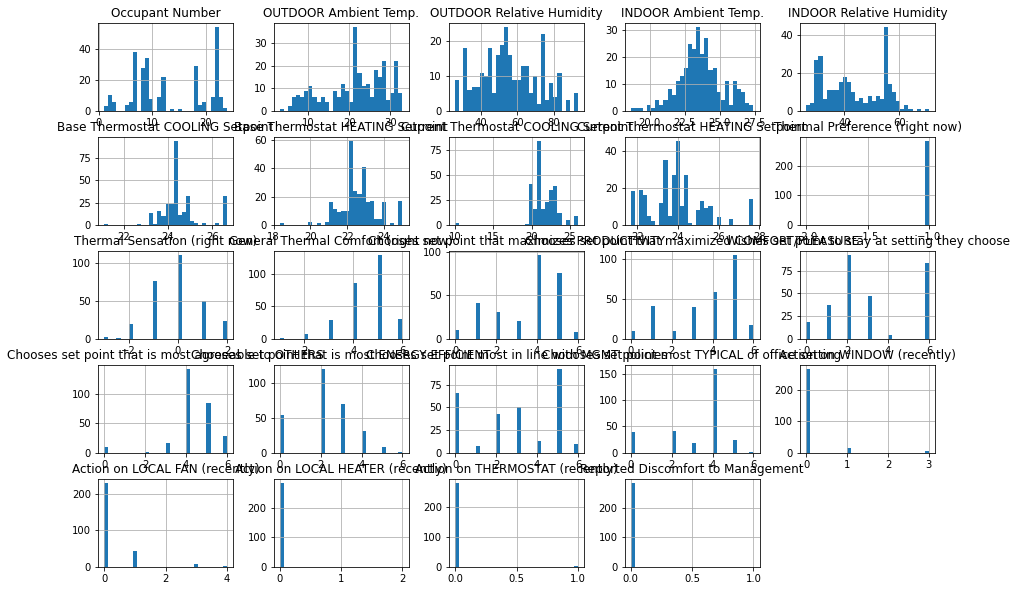

In [1316]:
dfCold.hist(bins=30, figsize=(15, 10))

**Creating Multi Regression Models to predict 'General Thermal Comfort (right now)' for the three personas based on current indoor and outdoor conditions**

In [1180]:
#drop features not needed for thermal comfort prediction
#'INDOOR Ambient Temp.', 'INDOOR Relative Humidity', 'Base Thermostat COOLING Setpoint', 'Base Thermostat HEATING Setpoint', 'Thermal Sensation (right now)'

dfColdTc = dfCold.drop(['Occupant Number', 'Chooses set point that maximized COMFORT/PLEASURE', 'Thermal Preference (right now)',
                       'Wishes set point to stay at setting they choose',
                       'Chooses set point that is most agreeable to OTHERS',
                       'Chooses set point that is most ENERGY EFFICIENT',
                       'Chooses set point most in line with MGMT policies',
                       'Choooses set point most TYPICAL of office setting',
                       'Action on WINDOW (recently)', 'Action on LOCAL FAN (recently)',
                       'Action on LOCAL HEATER (recently)', 'Action on THERMOSTAT (recently)',
                       'Reported Discomfort to Management'], axis=1)

array([[<AxesSubplot:title={'center':'OUTDOOR Ambient Temp.'}>,
        <AxesSubplot:title={'center':'OUTDOOR Relative Humidity'}>,
        <AxesSubplot:title={'center':'INDOOR Ambient Temp.'}>],
       [<AxesSubplot:title={'center':'INDOOR Relative Humidity'}>,
        <AxesSubplot:title={'center':'Base Thermostat COOLING Setpoint'}>,
        <AxesSubplot:title={'center':'Base Thermostat HEATING Setpoint'}>],
       [<AxesSubplot:title={'center':'Current Thermostat COOLING Setpoint'}>,
        <AxesSubplot:title={'center':'Current Thermostat HEATING Setpoint'}>,
        <AxesSubplot:title={'center':'Thermal Sensation (right now)'}>],
       [<AxesSubplot:title={'center':'General Thermal Comfort (right now)'}>,
        <AxesSubplot:title={'center':'Chooses set point that maximizes PRODUCTIVITY'}>,
        <AxesSubplot:>]], dtype=object)

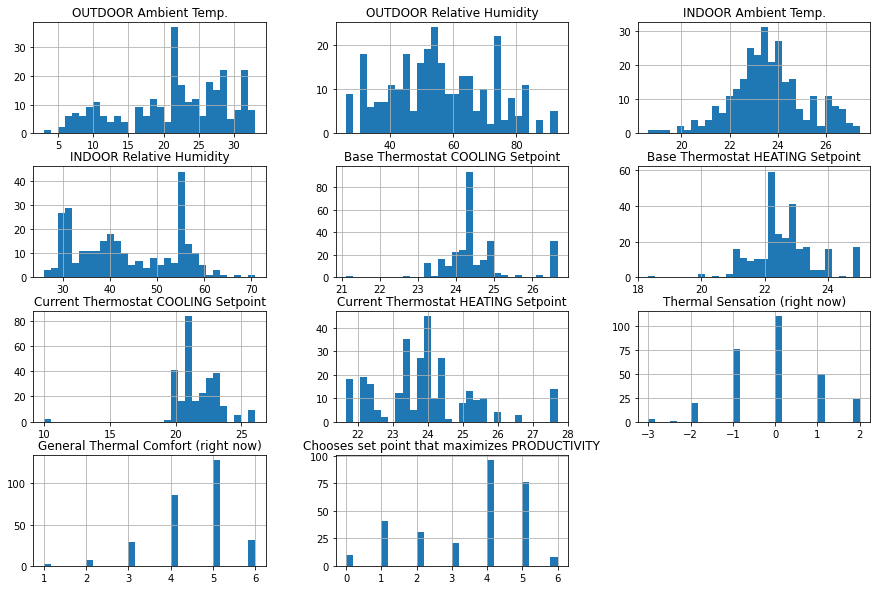

In [1110]:
dfColdTc.hist(bins=30, figsize=(15, 10))

In [1111]:
#checking the frequency of classes
dfColdTc['General Thermal Comfort (right now)'].value_counts()

5.0    128
4.0     86
6.0     31
3.0     29
2.0      7
1.0      2
Name: General Thermal Comfort (right now), dtype: int64

Seems like more occupants are comfortable

In [1015]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [1045]:
#data preparation for cold pref occupants 
xc = dfColdTc[['OUTDOOR Ambient Temp.', 'INDOOR Ambient Temp.', 'Current Thermostat COOLING Setpoint', 'Current Thermostat HEATING Setpoint']]
yc = dfColdTc[['General Thermal Comfort (right now)']]
yc.value_counts()

General Thermal Comfort (right now)
5.0                                    128
4.0                                     86
6.0                                     31
3.0                                     29
2.0                                      7
1.0                                      2
dtype: int64

In [1317]:
xc

,OUTDOOR Ambient Temp.,INDOOR Ambient Temp.,Current Thermostat COOLING Setpoint,Current Thermostat HEATING Setpoint
98,24.0,23.203719,22.577778,24.244444
101,21.0,23.376341,22.622222,24.288889
102,19.0,23.031097,22.622222,24.288889
124,28.0,22.806852,22.777778,24.444444
125,29.0,23.177724,22.777778,24.444444
...,...,...,...,...
2447,31.0,26.475000,20.395556,22.617778
2448,31.0,26.695000,20.395556,22.617778
2466,18.0,24.146111,20.764444,22.320000
2485,31.0,23.865556,20.000000,23.333333


In [1318]:
yc

,General Thermal Comfort (right now)
98,3.0
101,4.0
102,5.0
124,5.0
125,5.0
...,...
2447,4.0
2448,5.0
2466,5.0
2485,5.0


In [1040]:
#normalization
MinMaxScaler = preprocessing.MinMaxScaler()
xc_minmax = MinMaxScaler.fit_transform(xc)
xc_data = pd.DataFrame(xc_minmax, columns=['OUTDOOR Ambient Temp.', 'INDOOR Ambient Temp.', 'Current Thermostat COOLING Setpoint', 'Current Thermostat HEATING Setpoint'])

#split data into train and test
xc_train, xc_test, yc_train, yc_test = train_test_split(xc_data, yc, test_size = 0.3, random_state = 0)

**multiclass classification**

In [1041]:
#multiclass classification with logistic regression
logreg_cm = LogisticRegression(multi_class='ovr',solver='liblinear')

logreg_cm.fit(xc_train, yc_train)

ycm_pred1 = logreg_cm.predict(xc_test)

print(accuracy_score(yc_test, ycm_pred1))

0.4


C:\Users\pdongre\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1042]:
#multiclass classification with KNN
knn_cm = KNeighborsClassifier()

knn_cm.fit(xc_train, yc_train)

ycm_pred2 = knn_cm.predict(xc_test)

print(accuracy_score(yc_test, ycm_pred2))

0.38823529411764707


C:\Users\pdongre\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [1043]:
#multiclass classification with DT
dt_cm = DecisionTreeClassifier(criterion='entropy',max_depth=3)

dt_cm.fit(xc_train, yc_train)

ycm_pred3 = dt_cm.predict(xc_test)

print(accuracy_score(yc_test, ycm_pred3))

0.35294117647058826


**oversampling & multiclass classification**

In [1052]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(k_neighbors=1)
xcr, ycr = oversample.fit_resample(xc, yc)
ycr.value_counts()

General Thermal Comfort (right now)
1.0                                    128
2.0                                    128
3.0                                    128
4.0                                    128
5.0                                    128
6.0                                    128
dtype: int64

In [1051]:
#normalization
MinMaxScaler1 = preprocessing.MinMaxScaler()
xcr_minmax1 = MinMaxScaler1.fit_transform(xcr)
xcr_data1 = pd.DataFrame(xcr_minmax1, columns=['OUTDOOR Ambient Temp.', 'INDOOR Ambient Temp.', 'Current Thermostat COOLING Setpoint', 'Current Thermostat HEATING Setpoint'])

#split data into train and test
xcr_train, xcr_test, ycr_train, ycr_test = train_test_split(xcr_data1, ycr, test_size = 0.3, random_state = 0)

In [1059]:
#multiclass classification with logistic regression on oversampled dataset
logreg_cmr = LogisticRegression(multi_class='ovr',solver='liblinear')

logreg_cmr.fit(xcr_train, ycr_train)

ycmr_pred1 = logreg_cmr.predict(xcr_test)

print(accuracy_score(ycr_test, ycmr_pred1))

0.36796536796536794


C:\Users\pdongre\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1056]:
#multiclass classification with KNN on oversampled dataset
knn_cmr = KNeighborsClassifier()

knn_cmr.fit(xcr_train, ycr_train)

ycmr_pred2 = knn_cmr.predict(xcr_test)

print(accuracy_score(ycr_test, ycmr_pred2))

0.7316017316017316


C:\Users\pdongre\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [1319]:
#multiclass classification with DT on oversampled dataset
dt_cmr = DecisionTreeClassifier()

dt_cmr.fit(xcr_train, ycr_train)

ycmr_pred_ta = dt_cmr.predict(xcr_train)

ycmr_pred3 = dt_cmr.predict(xcr_test)

print(accuracy_score(ycr_train, ycmr_pred_ta))
print(accuracy_score(ycr_test, ycmr_pred3))

1.0
0.8268398268398268


In [1081]:
from sklearn.tree import export_graphviz 

export_graphviz(dt_cmr, out_file ='tree.dot')

In [1085]:
import pydot

graphs = pydot.graph_from_dot_file('tree.dot')
graph = graphs[0]
graph.write_png('tree.png')

In [1061]:
#multiclass with SVM on oversampled dataset
from sklearn.svm import SVC

svm_cmr = SVC()

svm_cmr.fit(xcr_train, ycr_train)

ycmr_pred4 = svm_cmr.predict(xcr_test)

print(accuracy_score(ycr_test, ycmr_pred4))

0.5497835497835498


C:\Users\pdongre\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1062]:
#multiclass with NB on oversampled dataset
from sklearn.naive_bayes import GaussianNB

gnb_cmr = GaussianNB()

gnb_cmr.fit(xcr_train, ycr_train)

ycmr_pred5 = gnb_cmr.predict(xcr_test)

print(accuracy_score(ycr_test, ycmr_pred5))

0.5064935064935064


C:\Users\pdongre\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1063]:
from sklearn.ensemble import RandomForestClassifier

classifier_cmr  = RandomForestClassifier()

classifier_cmr.fit(xcr_train, ycr_train)

ycmr_pred6 = classifier_cmr.predict(xcr_test)

print(accuracy_score(ycr_test, ycmr_pred6))

0.8268398268398268


C:\Users\pdongre\AppData\Local\Temp\ipykernel_14184\2548990677.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier_cmr.fit(xcr_train, ycr_train)


**binary classification**

In [1298]:
dfColdTc = dfCold.drop(['Occupant Number', 'Chooses set point that maximized COMFORT/PLEASURE', 'Thermal Preference (right now)',
                       'Wishes set point to stay at setting they choose',
                       'Chooses set point that is most agreeable to OTHERS',
                       'Chooses set point that is most ENERGY EFFICIENT',
                       'Chooses set point most in line with MGMT policies',
                       'Choooses set point most TYPICAL of office setting',
                       'Action on WINDOW (recently)', 'Action on LOCAL FAN (recently)',
                       'Action on LOCAL HEATER (recently)', 'Action on THERMOSTAT (recently)',
                       'Chooses set point that maximizes PRODUCTIVITY', 
                       'Reported Discomfort to Management'], axis=1)
dfColdTc

,OUTDOOR Ambient Temp.,OUTDOOR Relative Humidity,INDOOR Ambient Temp.,INDOOR Relative Humidity,Base Thermostat COOLING Setpoint,Base Thermostat HEATING Setpoint,Current Thermostat COOLING Setpoint,Current Thermostat HEATING Setpoint,Thermal Sensation (right now),General Thermal Comfort (right now)
98,24.0,44.0,23.203719,44.542,25.555556,24.444444,22.577778,24.244444,2.0,3.0
101,21.0,69.0,23.376341,54.802,25.111111,23.777778,22.622222,24.288889,0.0,4.0
102,19.0,73.0,23.031097,52.773,25.000000,23.444444,22.622222,24.288889,-1.0,5.0
124,28.0,51.0,22.806852,55.626,26.666667,23.888889,22.777778,24.444444,0.0,5.0
125,29.0,51.0,23.177724,55.626,26.666667,23.888889,22.777778,24.444444,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...
2447,31.0,31.0,26.475000,38.828,24.000000,21.888889,20.395556,22.617778,0.0,4.0
2448,31.0,31.0,26.695000,40.469,24.000000,21.888889,20.395556,22.617778,0.0,5.0
2466,18.0,73.0,24.146111,44.813,24.444444,22.555556,20.764444,22.320000,0.0,5.0
2485,31.0,40.0,23.865556,55.626,26.666667,25.000000,20.000000,23.333333,-1.0,5.0


In [1299]:
#for cold pref occupants with binary classification

#replacing labels; 0 = uncomfortable, 1 = comfortable
dfColdTc['General Thermal Comfort (right now)'] = dfColdTc['General Thermal Comfort (right now)'].replace([1, 2, 3, 4], 0)
dfColdTc['General Thermal Comfort (right now)'] = dfColdTc['General Thermal Comfort (right now)'].replace([5, 6], 1)
dfColdTc

,OUTDOOR Ambient Temp.,OUTDOOR Relative Humidity,INDOOR Ambient Temp.,INDOOR Relative Humidity,Base Thermostat COOLING Setpoint,Base Thermostat HEATING Setpoint,Current Thermostat COOLING Setpoint,Current Thermostat HEATING Setpoint,Thermal Sensation (right now),General Thermal Comfort (right now)
98,24.0,44.0,23.203719,44.542,25.555556,24.444444,22.577778,24.244444,2.0,0.0
101,21.0,69.0,23.376341,54.802,25.111111,23.777778,22.622222,24.288889,0.0,0.0
102,19.0,73.0,23.031097,52.773,25.000000,23.444444,22.622222,24.288889,-1.0,1.0
124,28.0,51.0,22.806852,55.626,26.666667,23.888889,22.777778,24.444444,0.0,1.0
125,29.0,51.0,23.177724,55.626,26.666667,23.888889,22.777778,24.444444,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2447,31.0,31.0,26.475000,38.828,24.000000,21.888889,20.395556,22.617778,0.0,0.0
2448,31.0,31.0,26.695000,40.469,24.000000,21.888889,20.395556,22.617778,0.0,1.0
2466,18.0,73.0,24.146111,44.813,24.444444,22.555556,20.764444,22.320000,0.0,1.0
2485,31.0,40.0,23.865556,55.626,26.666667,25.000000,20.000000,23.333333,-1.0,1.0


array([[<AxesSubplot:title={'center':'OUTDOOR Ambient Temp.'}>,
        <AxesSubplot:title={'center':'OUTDOOR Relative Humidity'}>,
        <AxesSubplot:title={'center':'INDOOR Ambient Temp.'}>],
       [<AxesSubplot:title={'center':'INDOOR Relative Humidity'}>,
        <AxesSubplot:title={'center':'Base Thermostat COOLING Setpoint'}>,
        <AxesSubplot:title={'center':'Base Thermostat HEATING Setpoint'}>],
       [<AxesSubplot:title={'center':'Current Thermostat COOLING Setpoint'}>,
        <AxesSubplot:title={'center':'Current Thermostat HEATING Setpoint'}>,
        <AxesSubplot:title={'center':'Thermal Sensation (right now)'}>],
       [<AxesSubplot:title={'center':'General Thermal Comfort (right now)'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

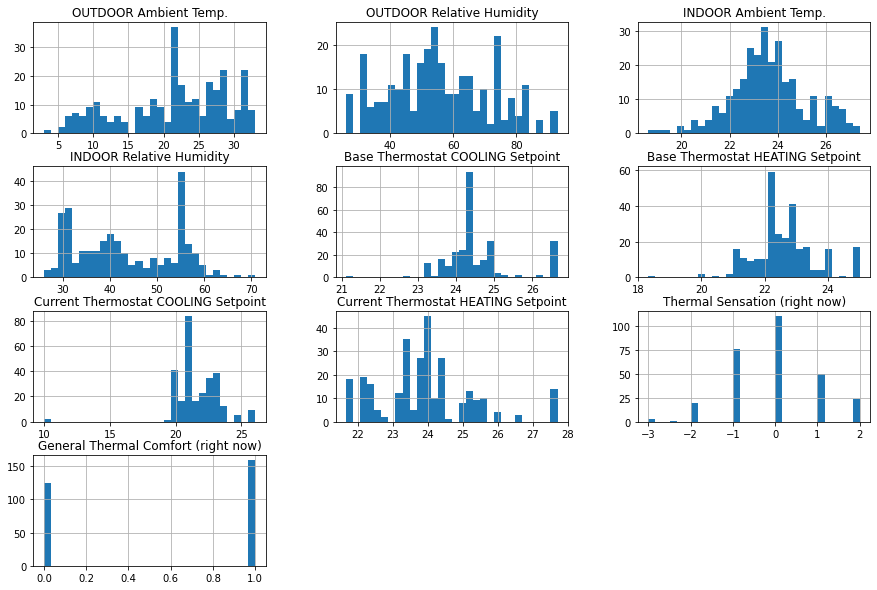

In [1225]:
dfColdTc.hist(bins=30, figsize=(15, 10))

In [1258]:
ycb = dfColdTc[['General Thermal Comfort (right now)']]
ycb.value_counts()

General Thermal Comfort (right now)
1.0                                    159
0.0                                    124
dtype: int64

In [1270]:
ycb = ycb.reset_index()
ycb = ycb.drop(['index'], axis=1)
ycb

,General Thermal Comfort (right now)
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
278,0.0
279,1.0
280,1.0
281,1.0


In [1275]:
xc_data

,OUTDOOR Ambient Temp.,INDOOR Ambient Temp.,Current Thermostat COOLING Setpoint,Current Thermostat HEATING Setpoint
0,0.700000,0.521762,0.783934,0.426470
1,0.600000,0.541445,0.786704,0.433824
2,0.533333,0.502079,0.786704,0.433824
3,0.833333,0.476510,0.796399,0.459559
4,0.866667,0.518798,0.796399,0.459559
...,...,...,...,...
278,0.933333,0.894763,0.647922,0.157353
279,0.933333,0.919848,0.647922,0.157353
280,0.500000,0.629216,0.670914,0.108088
281,0.933333,0.597227,0.623269,0.275735


In [1276]:
import statsmodels.api as sm
logit_model = sm.Logit(ycb,xc_data)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.671326
         Iterations 4
                                    Logit Regression Results                                   
Dep. Variable:     General Thermal Comfort (right now)   No. Observations:                  283
Model:                                           Logit   Df Residuals:                      279
Method:                                            MLE   Df Model:                            3
Date:                                 Fri, 22 Jul 2022   Pseudo R-squ.:                 0.02065
Time:                                         17:10:02   Log-Likelihood:                -189.99
converged:                                        True   LL-Null:                       -193.99
Covariance Type:                             nonrobust   LLR p-value:                   0.04578
                                          coef    std err          z      P>|z|      [0.025      0.975]
--------------------------

In [1280]:
xc_data.iloc[:, 0:2]

,OUTDOOR Ambient Temp.,INDOOR Ambient Temp.
0,0.700000,0.521762
1,0.600000,0.541445
2,0.533333,0.502079
3,0.833333,0.476510
4,0.866667,0.518798
...,...,...
278,0.933333,0.894763
279,0.933333,0.919848
280,0.500000,0.629216
281,0.933333,0.597227


In [1312]:
import statsmodels.api as sm
logit_model = sm.Logit(ycb, xc_data.iloc[:, 0:2])
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.675694
         Iterations 4
                                    Logit Regression Results                                   
Dep. Variable:     General Thermal Comfort (right now)   No. Observations:                  283
Model:                                           Logit   Df Residuals:                      281
Method:                                            MLE   Df Model:                            1
Date:                                 Fri, 22 Jul 2022   Pseudo R-squ.:                 0.01428
Time:                                         17:55:43   Log-Likelihood:                -191.22
converged:                                        True   LL-Null:                       -193.99
Covariance Type:                             nonrobust   LLR p-value:                   0.01860
                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------

In [1311]:
np.exp(result.params)

OUTDOOR Ambient Temp.    5.139579
INDOOR Ambient Temp.     0.247413
dtype: float64

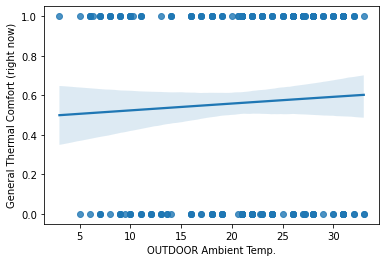

In [1306]:
import seaborn as sns
outd = sns.regplot(x= 'OUTDOOR Ambient Temp.', y= 'General Thermal Comfort (right now)', data= dfColdTc, logistic= True)
outd.figure.savefig("outd.png")

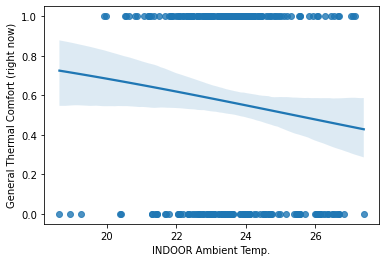

In [1304]:
ind = sns.regplot(x= 'INDOOR Ambient Temp.', y= 'General Thermal Comfort (right now)', data= dfColdTc, logistic= True)
ind.figure.savefig("ind.png")

In [1313]:
#split data into train and test
xcb_train, xcb_test, ycb_train, ycb_test = train_test_split(xc_data.iloc[:, 0:2], ycb, test_size = 0.3, random_state = 0)

In [1314]:
#binary classification with logistic regression
logregb = LogisticRegression()

logregb.fit(xcb_train, ycb_train)

ycb_pred = logregb.predict(xcb_test)

print(accuracy_score(ycb_test, ycb_pred))

0.4470588235294118


C:\Users\pdongre\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1297]:
print('intercept ', logregb.intercept_[0])
print('classes', logregb.classes_)
pd.DataFrame({'coeff': logregb.coef_[0]}, index=xc_data.iloc[:, 0:2].columns)

intercept  0.5298345142750278
classes [0. 1.]


,coeff
OUTDOOR Ambient Temp.,1.217301
INDOOR Ambient Temp.,-1.606096


In [1122]:
#trying to balance the dataset for better results
oversample_b = SMOTE()
xcr_b, ycr_b = oversample_b.fit_resample(xc, ycb)
ycr_b.value_counts()

0.0    245
1.0    245
Name: General Thermal Comfort (right now), dtype: int64

In [1123]:
xcr_b

,OUTDOOR Ambient Temp.,INDOOR Ambient Temp.,Current Thermostat COOLING Setpoint,Current Thermostat HEATING Setpoint
0,24.000000,23.203719,22.577778,24.244444
1,21.000000,23.376341,22.622222,24.288889
2,19.000000,23.031097,22.622222,24.288889
3,28.000000,22.806852,22.777778,24.444444
4,29.000000,23.177724,22.777778,24.444444
...,...,...,...,...
485,21.000000,23.796294,22.490286,23.422202
486,21.275600,26.028805,21.137244,22.715007
487,22.253348,25.992901,20.847172,22.346429
488,26.315918,25.962541,22.409663,24.631886


In [1124]:
ycr_b

0      0.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
485    0.0
486    0.0
487    0.0
488    0.0
489    0.0
Name: General Thermal Comfort (right now), Length: 490, dtype: float64

In [1125]:
#normalization
MinMaxScaler2 = preprocessing.MinMaxScaler()
xcr_minmax2 = MinMaxScaler2.fit_transform(xcr_b)
xcr_data2 = pd.DataFrame(xcr_minmax2, columns=['OUTDOOR Ambient Temp.', 'INDOOR Ambient Temp.', 'Current Thermostat COOLING Setpoint', 'Current Thermostat HEATING Setpoint'])

xcr_data2

,OUTDOOR Ambient Temp.,INDOOR Ambient Temp.,Current Thermostat COOLING Setpoint,Current Thermostat HEATING Setpoint
0,0.700000,0.521762,0.783934,0.426470
1,0.600000,0.541445,0.786704,0.433824
2,0.533333,0.502079,0.786704,0.433824
3,0.833333,0.476510,0.796399,0.459559
4,0.866667,0.518798,0.796399,0.459559
...,...,...,...,...
485,0.600000,0.589329,0.778480,0.290438
486,0.609187,0.843887,0.694150,0.173439
487,0.641778,0.839793,0.676070,0.112461
488,0.777197,0.836331,0.773456,0.490569


In [1126]:
#split data into train and test
xcr_b_train, xcr_b_test, ycr_b_train, ycr_b_test = train_test_split(xcr_data2, ycr_b, test_size = 0.3, random_state = 0)

In [1127]:
#binary classification with logistic regression
logregb1 = LogisticRegression()

logregb1.fit(xcr_b_train, ycr_b_train)

ycr_b_pred = logregb1.predict(xcr_b_test)

print(accuracy_score(ycr_b_test, ycr_b_pred))

0.6666666666666666


oversampling and normalization did not increase accuracy of the binomial logistic regression model

**Warm preference occupants**

In [1133]:
dfWarmTc = dfWarm.drop(['Occupant Number', 'Chooses set point that maximized COMFORT/PLEASURE', 'Thermal Preference (right now)',
                       'Wishes set point to stay at setting they choose',
                       'Chooses set point that is most agreeable to OTHERS',
                       'Chooses set point that is most ENERGY EFFICIENT',
                       'Chooses set point most in line with MGMT policies',
                       'Choooses set point most TYPICAL of office setting',
                       'Action on WINDOW (recently)', 'Action on LOCAL FAN (recently)',
                       'Action on LOCAL HEATER (recently)', 'Action on THERMOSTAT (recently)',
                       'Reported Discomfort to Management'], axis=1)

dfNeutralTc = dfNeutral.drop(['Occupant Number', 'Chooses set point that maximized COMFORT/PLEASURE', 'Thermal Preference (right now)',
                       'Wishes set point to stay at setting they choose',
                       'Chooses set point that is most agreeable to OTHERS',
                       'Chooses set point that is most ENERGY EFFICIENT',
                       'Chooses set point most in line with MGMT policies',
                       'Choooses set point most TYPICAL of office setting',
                       'Action on WINDOW (recently)', 'Action on LOCAL FAN (recently)',
                       'Action on LOCAL HEATER (recently)', 'Action on THERMOSTAT (recently)',
                       'Reported Discomfort to Management'], axis=1)

array([[<AxesSubplot:title={'center':'OUTDOOR Ambient Temp.'}>,
        <AxesSubplot:title={'center':'OUTDOOR Relative Humidity'}>,
        <AxesSubplot:title={'center':'INDOOR Ambient Temp.'}>],
       [<AxesSubplot:title={'center':'INDOOR Relative Humidity'}>,
        <AxesSubplot:title={'center':'Base Thermostat COOLING Setpoint'}>,
        <AxesSubplot:title={'center':'Base Thermostat HEATING Setpoint'}>],
       [<AxesSubplot:title={'center':'Current Thermostat COOLING Setpoint'}>,
        <AxesSubplot:title={'center':'Current Thermostat HEATING Setpoint'}>,
        <AxesSubplot:title={'center':'Thermal Sensation (right now)'}>],
       [<AxesSubplot:title={'center':'General Thermal Comfort (right now)'}>,
        <AxesSubplot:title={'center':'Chooses set point that maximizes PRODUCTIVITY'}>,
        <AxesSubplot:>]], dtype=object)

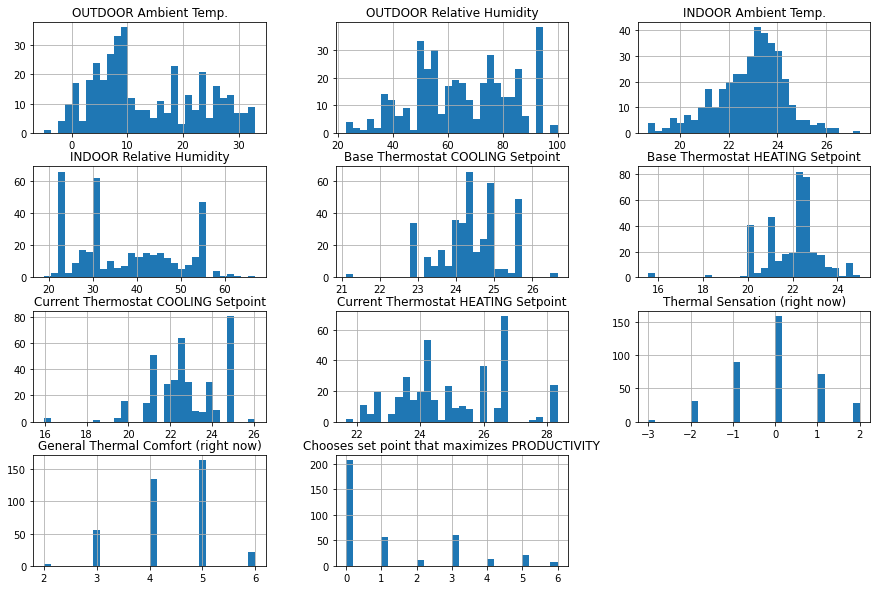

In [1129]:
dfWarmTc.hist(bins=30, figsize=(15,10))

In [1134]:
dfWarmTc['General Thermal Comfort (right now)'].value_counts()

5.0    164
4.0    135
3.0     56
6.0     22
2.0      3
Name: General Thermal Comfort (right now), dtype: int64

In [1135]:
#for warm pref occupants with binary classification

#replacing labels; 0 = uncomfortable, 1 = comfortable
dfWarmTc['General Thermal Comfort (right now)'] = dfWarmTc['General Thermal Comfort (right now)'].replace([1, 2, 3], 0)
dfWarmTc['General Thermal Comfort (right now)'] = dfWarmTc['General Thermal Comfort (right now)'].replace([4, 5, 6], 1)

ymb = dfWarmTc['General Thermal Comfort (right now)']
ymb.value_counts()

1.0    321
0.0     59
Name: General Thermal Comfort (right now), dtype: int64

In [1136]:
xm = dfWarmTc[['OUTDOOR Ambient Temp.', 'INDOOR Ambient Temp.', 'Current Thermostat COOLING Setpoint', 'Current Thermostat HEATING Setpoint']]

,OUTDOOR Ambient Temp.,INDOOR Ambient Temp.,Current Thermostat COOLING Setpoint,Current Thermostat HEATING Setpoint
8,30.000000,24.066829,23.577778,25.244444
11,32.000000,24.066829,24.133333,25.244444
12,26.000000,23.721585,24.133333,25.244444
15,26.000000,23.203719,24.133333,25.244444
17,24.000000,23.203719,24.133333,25.244444
...,...,...,...,...
2212,13.000000,23.447778,21.111111,22.222222
2213,13.611111,24.050000,21.111111,22.222222
2217,16.000000,22.368889,21.111111,22.222222
2219,17.000000,23.521111,21.111111,22.222222


In [1138]:
#normalizing
MinMaxScaler_m = preprocessing.MinMaxScaler()
xm_minmax = MinMaxScaler_m.fit_transform(xm)
xm_data = pd.DataFrame(xm_minmax, columns=['OUTDOOR Ambient Temp.', 'INDOOR Ambient Temp.', 'Current Thermostat COOLING Setpoint', 'Current Thermostat HEATING Setpoint'])
xm_data

,OUTDOOR Ambient Temp.,INDOOR Ambient Temp.,Current Thermostat COOLING Setpoint,Current Thermostat HEATING Setpoint
0,0.921053,0.618437,0.753846,0.536667
1,0.973684,0.618437,0.808791,0.536667
2,0.815789,0.578662,0.808791,0.536667
3,0.815789,0.518999,0.808791,0.536667
4,0.763158,0.518999,0.808791,0.536667
...,...,...,...,...
375,0.473684,0.547117,0.509890,0.083333
376,0.489766,0.616498,0.509890,0.083333
377,0.552632,0.422818,0.509890,0.083333
378,0.578947,0.555565,0.509890,0.083333


In [1139]:
#split data into train and test
xmb_train, xmb_test, ymb_train, ymb_test = train_test_split(xm_data, ymb, test_size = 0.3, random_state = 0)

In [1140]:
#binary classification with logistic regression
logregmb = LogisticRegression()

logregmb.fit(xmb_train, ymb_train)

ymb_pred = logregmb.predict(xmb_test)

print(accuracy_score(ymb_test, ymb_pred))

0.8596491228070176


In [1141]:
print(logregmb.coef_, logregmb.intercept_)

[[-0.21736155  0.24704738  0.15070754 -0.74378768]] [1.91773145]


**Neutral preference occupants**

In [1142]:
dfNeutralTc

,OUTDOOR Ambient Temp.,OUTDOOR Relative Humidity,INDOOR Ambient Temp.,INDOOR Relative Humidity,Base Thermostat COOLING Setpoint,Base Thermostat HEATING Setpoint,Current Thermostat COOLING Setpoint,Current Thermostat HEATING Setpoint,Thermal Sensation (right now),General Thermal Comfort (right now),Chooses set point that maximizes PRODUCTIVITY
0,28.0,66.0,23.721585,61.785,25.555556,24.444444,23.022222,25.244444,0.0,4.0,1.0
1,30.0,46.0,23.980518,58.670,25.555556,24.444444,23.022222,25.244444,-2.5,3.0,1.0
2,32.0,38.0,24.066829,54.120,25.555556,24.444444,23.022222,25.244444,0.0,5.0,1.0
3,27.0,51.0,23.290030,49.107,25.555556,24.444444,23.022222,25.244444,-1.0,4.0,1.0
4,28.0,48.0,23.548963,48.594,25.555556,24.444444,23.022222,25.244444,0.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2491,31.0,43.0,23.593889,55.626,26.666667,25.000000,20.000000,23.333333,0.0,5.0,2.0
2492,30.0,46.0,23.593889,55.626,26.666667,25.000000,20.000000,23.333333,-2.0,3.0,2.0
2493,26.0,84.0,23.231392,55.626,26.666667,25.000000,20.000000,23.333333,-2.0,4.0,2.0
2494,31.0,55.0,24.680556,55.626,26.666667,25.000000,22.177778,25.511111,0.0,5.0,2.0


array([[<AxesSubplot:title={'center':'OUTDOOR Ambient Temp.'}>,
        <AxesSubplot:title={'center':'OUTDOOR Relative Humidity'}>,
        <AxesSubplot:title={'center':'INDOOR Ambient Temp.'}>],
       [<AxesSubplot:title={'center':'INDOOR Relative Humidity'}>,
        <AxesSubplot:title={'center':'Base Thermostat COOLING Setpoint'}>,
        <AxesSubplot:title={'center':'Base Thermostat HEATING Setpoint'}>],
       [<AxesSubplot:title={'center':'Current Thermostat COOLING Setpoint'}>,
        <AxesSubplot:title={'center':'Current Thermostat HEATING Setpoint'}>,
        <AxesSubplot:title={'center':'Thermal Sensation (right now)'}>],
       [<AxesSubplot:title={'center':'General Thermal Comfort (right now)'}>,
        <AxesSubplot:title={'center':'Chooses set point that maximizes PRODUCTIVITY'}>,
        <AxesSubplot:>]], dtype=object)

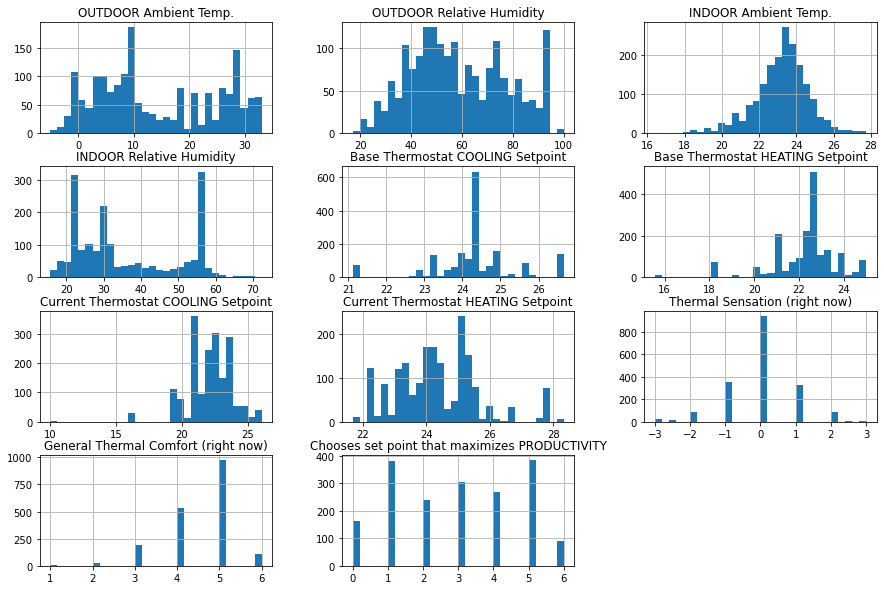

In [1143]:
dfNeutralTc.hist(bins=30, figsize=(15,10))

In [1144]:
dfNeutralTc['General Thermal Comfort (right now)'].value_counts()

5.0    973
4.0    534
3.0    193
6.0    105
2.0     23
1.0      5
Name: General Thermal Comfort (right now), dtype: int64

In [1145]:
#for neutral pref occupants using binary classification

#replacing labels; 0 = uncomfortable, 1 = comfortable
dfNeutralTc['General Thermal Comfort (right now)'] = dfNeutralTc['General Thermal Comfort (right now)'].replace([1, 2, 3], 0)
dfNeutralTc['General Thermal Comfort (right now)'] = dfNeutralTc['General Thermal Comfort (right now)'].replace([4, 5, 6], 1)

In [1146]:
ynb = dfNeutralTc['General Thermal Comfort (right now)']
ynb.value_counts()

1.0    1612
0.0     221
Name: General Thermal Comfort (right now), dtype: int64

In [1147]:
xn = dfNeutralTc[['OUTDOOR Ambient Temp.', 'INDOOR Ambient Temp.', 'Current Thermostat COOLING Setpoint', 'Current Thermostat HEATING Setpoint']]
xn

,OUTDOOR Ambient Temp.,INDOOR Ambient Temp.,Current Thermostat COOLING Setpoint,Current Thermostat HEATING Setpoint
0,28.0,23.721585,23.022222,25.244444
1,30.0,23.980518,23.022222,25.244444
2,32.0,24.066829,23.022222,25.244444
3,27.0,23.290030,23.022222,25.244444
4,28.0,23.548963,23.022222,25.244444
...,...,...,...,...
2491,31.0,23.593889,20.000000,23.333333
2492,30.0,23.593889,20.000000,23.333333
2493,26.0,23.231392,20.000000,23.333333
2494,31.0,24.680556,22.177778,25.511111


In [1148]:
#normalizing
MinMaxScaler_n = preprocessing.MinMaxScaler()
xn_minmax = MinMaxScaler_n.fit_transform(xn)
xn_data = pd.DataFrame(xn_minmax, columns=['OUTDOOR Ambient Temp.', 'INDOOR Ambient Temp.', 'Current Thermostat COOLING Setpoint', 'Current Thermostat HEATING Setpoint'])
xn_data

,OUTDOOR Ambient Temp.,INDOOR Ambient Temp.,Current Thermostat COOLING Setpoint,Current Thermostat HEATING Setpoint
0,0.868421,0.645254,0.811634,0.536667
1,0.921053,0.668049,0.811634,0.536667
2,0.973684,0.675648,0.811634,0.536667
3,0.842105,0.607261,0.811634,0.536667
4,0.868421,0.630056,0.811634,0.536667
...,...,...,...,...
1828,0.947368,0.634012,0.623269,0.250000
1829,0.921053,0.634012,0.623269,0.250000
1830,0.815789,0.602098,0.623269,0.250000
1831,0.947368,0.729678,0.759003,0.576667


In [1149]:
#split data into train and test
xnb_train, xnb_test, ynb_train, ynb_test = train_test_split(xn_data, ynb, test_size = 0.3, random_state = 0)

In [1150]:
#binary classification with logistic regression
logregnb = LogisticRegression()

logregnb.fit(xnb_train, ynb_train)

ynb_pred = logregnb.predict(xnb_test)

print(accuracy_score(ynb_test, ynb_pred))

0.8763636363636363


In [1152]:
print(logregn.coef_, logregnb.intercept_)

[[-0.01714937 -0.00642759  0.12741251 -0.11213041]] [1.68646107]


**Predicting Action based on Comfort and Personality**

In [946]:
dfCold.columns

Index(['Occupant Number', 'OUTDOOR Ambient Temp.', 'OUTDOOR Relative Humidity',
       'INDOOR Ambient Temp.', 'INDOOR Relative Humidity',
       'Base Thermostat COOLING Setpoint', 'Base Thermostat HEATING Setpoint',
       'Current Thermostat COOLING Setpoint',
       'Current Thermostat HEATING Setpoint', 'Thermal Preference (right now)',
       'Thermal Sensation (right now)', 'General Thermal Comfort (right now)',
       'Chooses set point that maximizes PRODUCTIVITY',
       'Chooses set point that maximized COMFORT/PLEASURE',
       'Wishes set point to stay at setting they choose',
       'Chooses set point that is most agreeable to OTHERS',
       'Chooses set point that is most ENERGY EFFICIENT',
       'Chooses set point most in line with MGMT policies',
       'Choooses set point most TYPICAL of office setting',
       'Action on WINDOW (recently)', 'Action on LOCAL FAN (recently)',
       'Action on LOCAL HEATER (recently)', 'Action on THERMOSTAT (recently)',
       'Repor

In [1154]:
dfColdA = dfCold[['General Thermal Comfort (right now)', 
                  'Chooses set point that is most agreeable to OTHERS', 
                  'Action on WINDOW (recently)', 
                  'Action on LOCAL FAN (recently)', 
                  'Action on LOCAL HEATER (recently)', 
                  'Action on THERMOSTAT (recently)']]
dfColdA

,General Thermal Comfort (right now),Chooses set point that is most agreeable to OTHERS,Action on WINDOW (recently),Action on LOCAL FAN (recently),Action on LOCAL HEATER (recently),Action on THERMOSTAT (recently)
98,3.0,4.0,0.0,0.0,0.0,0.0
101,4.0,4.0,0.0,0.0,0.0,0.0
102,5.0,4.0,0.0,0.0,0.0,0.0
124,5.0,4.0,0.0,0.0,0.0,0.0
125,5.0,4.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2447,4.0,3.0,0.0,0.0,0.0,0.0
2448,5.0,3.0,0.0,0.0,0.0,0.0
2466,5.0,3.0,0.0,0.0,0.0,0.0
2485,5.0,4.0,0.0,0.0,0.0,0.0


array([[<AxesSubplot:title={'center':'General Thermal Comfort (right now)'}>,
        <AxesSubplot:title={'center':'Chooses set point that is most agreeable to OTHERS'}>],
       [<AxesSubplot:title={'center':'Action on WINDOW (recently)'}>,
        <AxesSubplot:title={'center':'Action on LOCAL FAN (recently)'}>],
       [<AxesSubplot:title={'center':'Action on LOCAL HEATER (recently)'}>,
        <AxesSubplot:title={'center':'Action on THERMOSTAT (recently)'}>]],
      dtype=object)

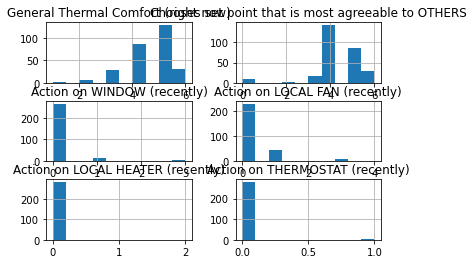

In [1155]:
dfColdA.hist()

In [1156]:
#replacing all action features by general action feature by taking the mode of action features
dfColdA['General Action'] = dfColdA[['Action on WINDOW (recently)', 'Action on LOCAL FAN (recently)', 'Action on LOCAL HEATER (recently)', 'Action on THERMOSTAT (recently)']].max(axis=1)
dfColdA = dfColdA.drop(['Action on WINDOW (recently)', 'Action on LOCAL FAN (recently)', 'Action on LOCAL HEATER (recently)', 'Action on THERMOSTAT (recently)'], axis=1)
dfColdA

C:\Users\pdongre\AppData\Local\Temp\ipykernel_14184\3508087808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfColdA['General Action'] = dfColdA[['Action on WINDOW (recently)', 'Action on LOCAL FAN (recently)', 'Action on LOCAL HEATER (recently)', 'Action on THERMOSTAT (recently)']].max(axis=1)


,General Thermal Comfort (right now),Chooses set point that is most agreeable to OTHERS,General Action
98,3.0,4.0,0.0
101,4.0,4.0,0.0
102,5.0,4.0,0.0
124,5.0,4.0,0.0
125,5.0,4.0,0.0
...,...,...,...
2447,4.0,3.0,0.0
2448,5.0,3.0,0.0
2466,5.0,3.0,0.0
2485,5.0,4.0,0.0


In [1157]:
dfColdA['General Action'].value_counts()

0.0    216
1.0     52
3.0     13
2.0      1
4.0      1
Name: General Action, dtype: int64

More instances of no action

In [1161]:
#categorizing general action into binary; 0 = no action, 1 = action 
dfColdA['General Action'] = dfColdA['General Action'].replace([1, 2, 3, 4], 1)
dfColdA

,General Thermal Comfort (right now),Chooses set point that is most agreeable to OTHERS,General Action
98,3.0,4.0,0.0
101,4.0,4.0,0.0
102,5.0,4.0,0.0
124,5.0,4.0,0.0
125,5.0,4.0,0.0
...,...,...,...
2447,4.0,3.0,0.0
2448,5.0,3.0,0.0
2466,5.0,3.0,0.0
2485,5.0,4.0,0.0


In [1162]:
dfColdA['General Action'].value_counts()

0.0    216
1.0     67
Name: General Action, dtype: int64

In [1158]:
dfWarmA = dfWarm[['General Thermal Comfort (right now)', 
                  'Chooses set point that is most agreeable to OTHERS', 
                  'Action on WINDOW (recently)', 
                  'Action on LOCAL FAN (recently)', 
                  'Action on LOCAL HEATER (recently)', 
                  'Action on THERMOSTAT (recently)']]
dfWarmA

,General Thermal Comfort (right now),Chooses set point that is most agreeable to OTHERS,Action on WINDOW (recently),Action on LOCAL FAN (recently),Action on LOCAL HEATER (recently),Action on THERMOSTAT (recently)
8,4.0,4.0,0.0,0.0,0.0,0.0
11,5.0,4.0,0.0,0.0,0.0,0.0
12,4.0,4.0,0.0,0.0,0.0,0.0
15,4.0,4.0,0.0,0.0,0.0,0.0
17,4.0,4.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2212,4.0,5.0,0.0,0.0,0.0,0.0
2213,4.0,5.0,0.0,0.0,0.0,0.0
2217,4.0,5.0,0.0,0.0,0.0,0.0
2219,5.0,5.0,0.0,0.0,0.0,0.0


array([[<AxesSubplot:title={'center':'General Thermal Comfort (right now)'}>,
        <AxesSubplot:title={'center':'Chooses set point that is most agreeable to OTHERS'}>],
       [<AxesSubplot:title={'center':'Action on WINDOW (recently)'}>,
        <AxesSubplot:title={'center':'Action on LOCAL FAN (recently)'}>],
       [<AxesSubplot:title={'center':'Action on LOCAL HEATER (recently)'}>,
        <AxesSubplot:title={'center':'Action on THERMOSTAT (recently)'}>]],
      dtype=object)

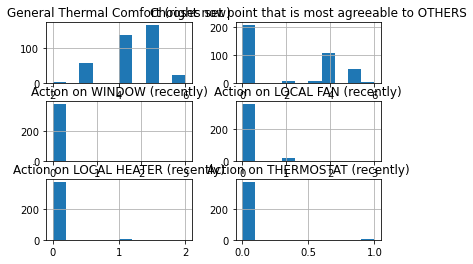

In [1159]:
dfWarmA.hist()

In [1163]:
dfWarmA['General Action'] = dfWarmA[['Action on WINDOW (recently)', 'Action on LOCAL FAN (recently)', 'Action on LOCAL HEATER (recently)', 'Action on THERMOSTAT (recently)']].max(axis=1)
dfWarmA = dfWarmA.drop(['Action on WINDOW (recently)', 'Action on LOCAL FAN (recently)', 'Action on LOCAL HEATER (recently)', 'Action on THERMOSTAT (recently)'], axis=1)
dfWarmA

C:\Users\pdongre\AppData\Local\Temp\ipykernel_14184\3477674533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfWarmA['General Action'] = dfWarmA[['Action on WINDOW (recently)', 'Action on LOCAL FAN (recently)', 'Action on LOCAL HEATER (recently)', 'Action on THERMOSTAT (recently)']].max(axis=1)


,General Thermal Comfort (right now),Chooses set point that is most agreeable to OTHERS,General Action
8,4.0,4.0,0.0
11,5.0,4.0,0.0
12,4.0,4.0,0.0
15,4.0,4.0,0.0
17,4.0,4.0,0.0
...,...,...,...
2212,4.0,5.0,0.0
2213,4.0,5.0,0.0
2217,4.0,5.0,0.0
2219,5.0,5.0,0.0


In [1164]:
dfWarmA['General Action'].value_counts()

0.0    343
1.0     31
3.0      4
2.0      2
Name: General Action, dtype: int64

In [1165]:
#categorizing general action into binary; 0 = no action, 1 = action 
dfWarmA['General Action'] = dfWarmA['General Action'].replace([1, 2, 3, 4], 1)
dfWarmA

,General Thermal Comfort (right now),Chooses set point that is most agreeable to OTHERS,General Action
8,4.0,4.0,0.0
11,5.0,4.0,0.0
12,4.0,4.0,0.0
15,4.0,4.0,0.0
17,4.0,4.0,0.0
...,...,...,...
2212,4.0,5.0,0.0
2213,4.0,5.0,0.0
2217,4.0,5.0,0.0
2219,5.0,5.0,0.0


In [1166]:
dfWarmA['General Action'].value_counts()

0.0    343
1.0     37
Name: General Action, dtype: int64

In [1167]:
dfNeutralA = dfNeutral[['General Thermal Comfort (right now)', 
                  'Chooses set point that is most agreeable to OTHERS', 
                  'Action on WINDOW (recently)', 
                  'Action on LOCAL FAN (recently)', 
                  'Action on LOCAL HEATER (recently)', 
                  'Action on THERMOSTAT (recently)']]
dfNeutralA

,General Thermal Comfort (right now),Chooses set point that is most agreeable to OTHERS,Action on WINDOW (recently),Action on LOCAL FAN (recently),Action on LOCAL HEATER (recently),Action on THERMOSTAT (recently)
0,4.0,4.0,0.0,0.0,0.0,0.0
1,3.0,4.0,0.0,0.0,0.0,0.0
2,5.0,4.0,0.0,0.0,0.0,0.0
3,4.0,4.0,0.0,0.0,0.0,0.0
4,5.0,4.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2491,5.0,4.0,0.0,0.0,0.0,0.0
2492,3.0,4.0,0.0,0.0,0.0,0.0
2493,4.0,4.0,0.0,0.0,0.0,0.0
2494,5.0,4.0,0.0,0.0,0.0,0.0


array([[<AxesSubplot:title={'center':'General Thermal Comfort (right now)'}>,
        <AxesSubplot:title={'center':'Chooses set point that is most agreeable to OTHERS'}>],
       [<AxesSubplot:title={'center':'Action on WINDOW (recently)'}>,
        <AxesSubplot:title={'center':'Action on LOCAL FAN (recently)'}>],
       [<AxesSubplot:title={'center':'Action on LOCAL HEATER (recently)'}>,
        <AxesSubplot:title={'center':'Action on THERMOSTAT (recently)'}>]],
      dtype=object)

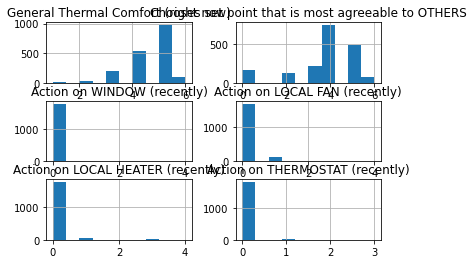

In [1168]:
dfNeutralA.hist()

In [1169]:
dfNeutralA['General Action'] = dfNeutralA[['Action on WINDOW (recently)', 'Action on LOCAL FAN (recently)', 'Action on LOCAL HEATER (recently)', 'Action on THERMOSTAT (recently)']].max(axis=1)
dfNeutralA = dfNeutralA.drop(['Action on WINDOW (recently)', 'Action on LOCAL FAN (recently)', 'Action on LOCAL HEATER (recently)', 'Action on THERMOSTAT (recently)'], axis=1)
dfNeutralA

C:\Users\pdongre\AppData\Local\Temp\ipykernel_14184\400845023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNeutralA['General Action'] = dfNeutralA[['Action on WINDOW (recently)', 'Action on LOCAL FAN (recently)', 'Action on LOCAL HEATER (recently)', 'Action on THERMOSTAT (recently)']].max(axis=1)


,General Thermal Comfort (right now),Chooses set point that is most agreeable to OTHERS,General Action
0,4.0,4.0,0.0
1,3.0,4.0,0.0
2,5.0,4.0,0.0
3,4.0,4.0,0.0
4,5.0,4.0,0.0
...,...,...,...
2491,5.0,4.0,0.0
2492,3.0,4.0,0.0
2493,4.0,4.0,0.0
2494,5.0,4.0,0.0


In [1170]:
dfNeutralA['General Action'].value_counts()

0.0    1584
1.0     196
3.0      36
2.0      12
4.0       5
Name: General Action, dtype: int64

In [1171]:
#categorizing general action into binary; 0 = no action, 1 = action 
dfNeutralA['General Action'] = dfNeutralA['General Action'].replace([1, 2, 3, 4], 1)
dfNeutralA

,General Thermal Comfort (right now),Chooses set point that is most agreeable to OTHERS,General Action
0,4.0,4.0,0.0
1,3.0,4.0,0.0
2,5.0,4.0,0.0
3,4.0,4.0,0.0
4,5.0,4.0,0.0
...,...,...,...
2491,5.0,4.0,0.0
2492,3.0,4.0,0.0
2493,4.0,4.0,0.0
2494,5.0,4.0,0.0


In [1172]:
dfNeutralA['General Action'].value_counts()

0.0    1584
1.0     249
Name: General Action, dtype: int64